In [2]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
img = cv2.imread('./FIJI_samples/AuPbSn40.jpg');

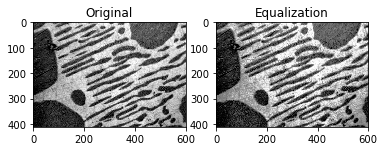

In [4]:
hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

In [38]:
img = cv2.imread('./FIJI_samples/AuPbSn40.jpg',0);

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(240,320))
img2 = cv2.resize(img2,(240,320))

img3 = img2-img

# GaussianBlur
img4 = cv2.GaussianBlur(img2,(5,5),0)

In [39]:
# img  : 원본
# img2 : 히스토그램 평활화
# img3 : img2 - img
# img4 : 히스토그램 펼활화 -> 가우시안 블러링

dst = np.hstack((img, img2, img3, img4))
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 이미지 Blending
이미지를 서로 합칠 때 가중치를 두어 합치는 방법입니다.

g(x)=(1−α)f0(x)+αf1(x)

g(x)=(1−α)f0(x)+αf1(x)

a 값이 0 -> 1로 변함에 따라서 이미지가 전환된다.

아래 예제는 trackbar의 값을 조정함에 따라서 이미지가 변환되는 예제입니다.

In [40]:
def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('W', 'image', 0, 100, nothing)

while True:

    w = cv2.getTrackbarPos('W','image')

    dst = cv2.addWeighted(img3,float(100-w) * 0.01, img4,float(w) * 0.01,0)

    cv2.imshow('dst', dst)

    if cv2.waitKey(1) &0xFF == 27:
        break;

cv2.destroyAllWindows()

In [41]:
# 히스토그램 평활화의 변화량과 가우시안 필터링 결과값을 합침.

dst = cv2.addWeighted(img3,float(100-83) * 0.01, img4,float(83) * 0.01,0)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [42]:
# 미디언 필터링

# Median Blur
img5 = cv2.medianBlur(dst,7)

# img4 : 히스토그램 펼활화 -> 가우시안 블러링
# dst  : 히스토그램 평활화의 변화량(img2 - img) + 가우시안 블러링(img4)
# img5 : dst의 미디언 필터링
dst3 = np.hstack((img4, dst, img5))
cv2.imshow('img', dst3)
cv2.waitKey()
cv2.destroyAllWindows()


In [43]:
# Otsu의 이진화

# global thresholding
ret1, th1 = cv2.threshold(img5, 127, 255, cv2.THRESH_BINARY)

# Otsu thresholding
ret3, th3 = cv2.threshold(img5, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dst4 = np.hstack((img5, th1, th3))
cv2.imshow('img', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
# img5(dst의 미디언 필터링)를 히스토그램 평활화를 한번 더 해준 후 
# Otsu thresholding 적용

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img6 = clahe.apply(img5)

# Otsu thresholding
ret4, th4 = cv2.threshold(img6, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgt1 = th3 - th4
imgt2 = th4 - th3
img7 = np.maximum(imgt1,imgt2)

dst5 = np.hstack((img5, th3, th4, img7))
cv2.imshow('img', dst5)
cv2.waitKey()
cv2.destroyAllWindows()